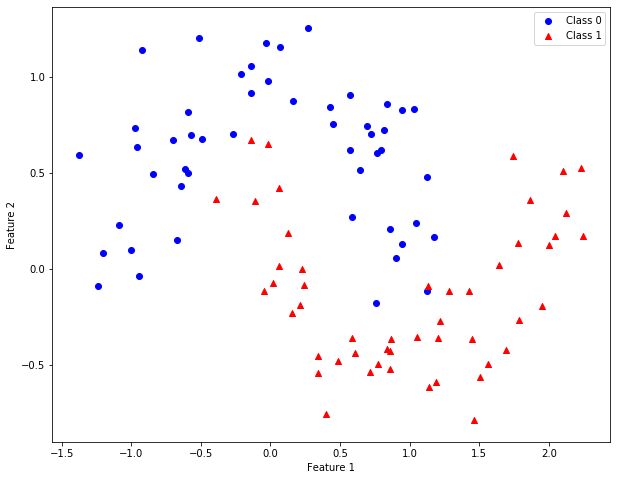

In [0]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X, y = make_moons(noise=0.2, random_state=2)

plt.figure(figsize=(10,8))

plt.scatter(X[y==0,0],X[y==0,1], c='blue', marker = 'o', label= 'Class 0')
plt.scatter(X[y==1,0],X[y==1,1], c='red', marker = '^', label= 'Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.show()

In [0]:
from sklearn.tree import DecisionTreeClassifier
DTCObject = DecisionTreeClassifier(max_depth=2, random_state=0)
DTCFitting = DTCObject.fit(X,y)

In [0]:
DTCObject.tree_.threshold

array([ 0.03681954, -0.49482284, -2.        , -2.        ,  1.45873588,
       -2.        , -2.        ])

In [0]:
DTCObject.tree_.children_left

array([ 1,  2, -1, -1,  5, -1, -1], dtype=int64)

In [0]:
DTCObject.tree_.children_right

array([ 4,  3, -1, -1,  6, -1, -1], dtype=int64)

In [0]:
DTCObject.tree_.node_count

7

In [0]:
import numpy as np

depth_information = np.zeros(DTCObject.tree_.node_count)
parent_information = np.zeros(DTCObject.tree_.node_count)

for nodes in np.arange(DTCObject.tree_.node_count):
    if DTCObject.tree_.children_left[nodes]!=DTCObject.tree_.children_right[nodes]:
        print(f'Node {nodes} in the decision tree has its left child: Node {DTCObject.tree_.children_left[nodes]}')
        print(f'Node {nodes} in the decision tree has its right child: Node {DTCObject.tree_.children_right[nodes]}')
        
        depth_information[DTCObject.tree_.children_left[nodes]] = depth_information[nodes]+1
        depth_information[DTCObject.tree_.children_right[nodes]] = depth_information[nodes]+1
        parent_information[DTCObject.tree_.children_left[nodes]] = nodes
        parent_information[DTCObject.tree_.children_right[nodes]] = nodes
        
        print(f'Current depth is {depth_information[nodes]}')
        print(f'The threshold at Node {nodes} in the decision tree is {DTCObject.tree_.threshold[nodes]}\n')

Node 0 in the decision tree has its left child: Node 1
Node 0 in the decision tree has its right child: Node 4
Current depth is 0.0
The threshold at Node 0 in the decision tree is 0.03681954462081194

Node 1 in the decision tree has its left child: Node 2
Node 1 in the decision tree has its right child: Node 3
Current depth is 1.0
The threshold at Node 1 in the decision tree is -0.49482283741235733

Node 4 in the decision tree has its left child: Node 5
Node 4 in the decision tree has its right child: Node 6
Current depth is 1.0
The threshold at Node 4 in the decision tree is 1.4587358832359314



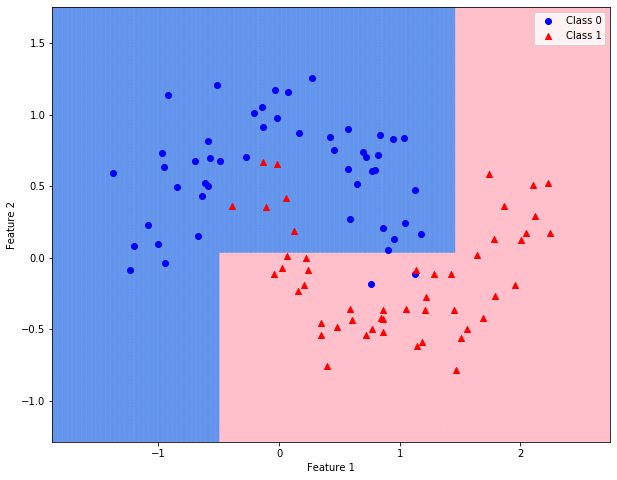

In [0]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

camp_color = ListedColormap(['cornflowerblue', 'pink'])

x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5

x_index = np.linspace(x_min, x_max, 1000)
y_index = np.linspace(y_min, y_max, 1000)

x_grid, y_grid = np.meshgrid(x_index, y_index)

X_samples = np.c_[x_grid.ravel(), y_grid.ravel()]

Prediction_X = DTCFitting.predict(X_samples)

Prediction_X = Prediction_X.reshape(x_grid.shape)

plt.figure(figsize=(10,8))

plt.pcolormesh(x_grid, y_grid, Prediction_X, alpha = 0.4, cmap = camp_color)

plt.scatter(X[y==0,0],X[y==0,1], c='blue', marker = 'o', label= 'Class 0')
plt.scatter(X[y==1,0],X[y==1,1], c='red', marker = '^', label= 'Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.show()

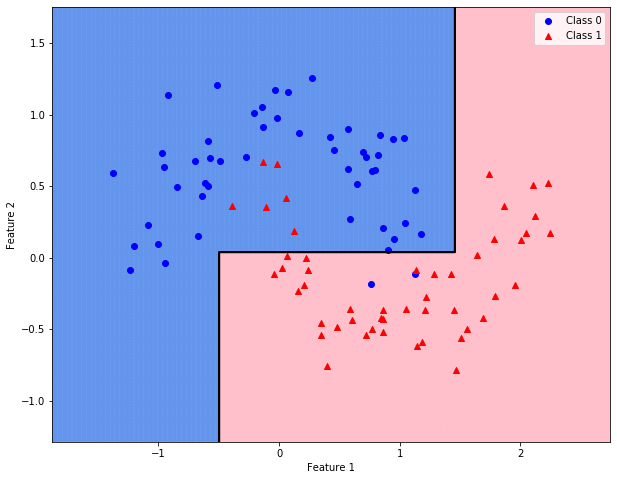

In [0]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

camp_color = ListedColormap(['cornflowerblue', 'pink'])

x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5

x_index = np.linspace(x_min, x_max, 1000)
y_index = np.linspace(y_min, y_max, 1000)

x_grid, y_grid = np.meshgrid(x_index, y_index)

X_samples = np.c_[x_grid.ravel(), y_grid.ravel()]

Prediction_X = DTCFitting.predict(X_samples)

Prediction_X = Prediction_X.reshape(x_grid.shape)

plt.figure(figsize=(10,8))

plt.pcolormesh(x_grid, y_grid, Prediction_X, alpha = 0.4, cmap = camp_color)
plt.contour(x_grid, y_grid, Prediction_X, colors = 'black')

plt.scatter(X[y==0,0],X[y==0,1], c='blue', marker = 'o', label= 'Class 0')
plt.scatter(X[y==1,0],X[y==1,1], c='red', marker = '^', label= 'Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.show()

In [0]:
from sklearn.datasets import load_breast_cancer

CB_data = load_breast_cancer()

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CB_data.data, CB_data.target, random_state = 0)

In [0]:
from sklearn.tree import DecisionTreeClassifier

DTObject = DecisionTreeClassifier(max_depth=6, random_state=0)
DTFitting = DTObject.fit(X_train, y_train)

In [0]:
DTFitting.score(X_train, y_train)

0.9976525821596244

In [0]:
DTFitting.score(X_test, y_test)

0.9230769230769231

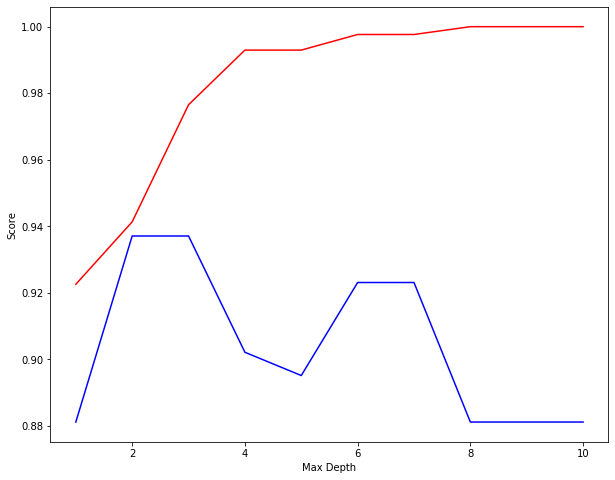

In [0]:
import matplotlib.pyplot as plt
import numpy as np

Training_Score = []
Testing_Score = []

Max_Depth = np.arange(10) + 1

for depth in Max_Depth:
    DTObject = DecisionTreeClassifier(max_depth=depth, random_state=0)
    DTFitting = DTObject.fit(X_train, y_train)
    Training_Score.append(DTFitting.score(X_train, y_train))
    Testing_Score.append(DTFitting.score(X_test, y_test))

plt.figure(figsize = (10,8))
plt.plot(Max_Depth, Training_Score, c='red')
plt.plot(Max_Depth, Testing_Score, c='blue')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.show()

In [0]:
from sklearn.tree import DecisionTreeClassifier

DTObject = DecisionTreeClassifier(max_depth=4, random_state=0)
DTFitting = DTObject.fit(X_train, y_train)

In [0]:
from sklearn.tree import export_graphviz

export_graphviz(DTFitting, out_file="tree.dot", class_names=["maligant","benign"],\
feature_names=CB_data.feature_names, impurity=False, filled=True)


In [0]:
import graphviz

with open("C:/Users/user/Downloads/tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [0]:
DTFitting.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.72099985, 0.        , 0.        ,
       0.        , 0.        , 0.02007711, 0.01727487, 0.        ,
       0.        , 0.        , 0.        , 0.0124106 , 0.        ,
       0.        , 0.05097828, 0.        , 0.11722141, 0.        ,
       0.03525964, 0.01026499, 0.        , 0.        , 0.01551325])

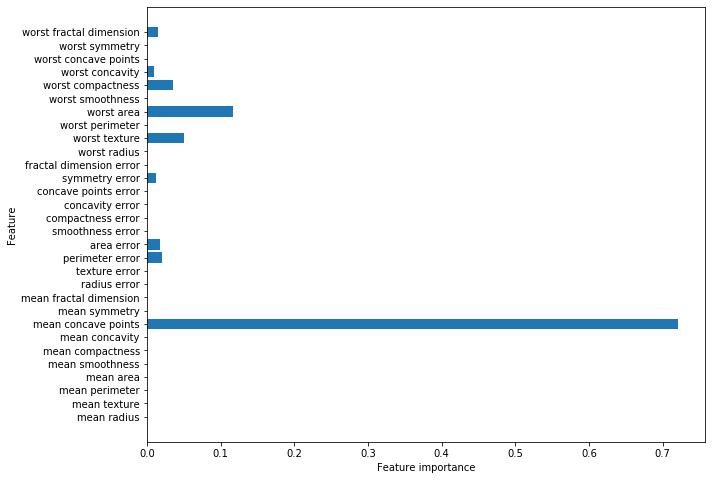

In [0]:
import matplotlib.pyplot as plt
import numpy as np

n_features = CB_data.data.shape[1]

plt.figure(figsize=(10,8))

plt.barh(np.arange(n_features), DTFitting.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), CB_data.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Feature')

plt.show()


In [0]:
import pandas as pd
Dataset = pd.read_csv('pima-indians-diabetes.csv')
Target = Dataset['Outcome']
Dataset.iloc[:,0:8]

X = Dataset.iloc[:,0:8].values
y = Target.values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [0]:
from sklearn.tree import DecisionTreeClassifier
DTObject = DecisionTreeClassifier(max_depth=4, random_state=0)
DTFitting = DTObject.fit(X_train, y_train)

In [0]:
DTFitting.score(X_train, y_train)

0.7795138888888888

In [0]:
DTFitting.score(X_test, y_test)

0.7447916666666666

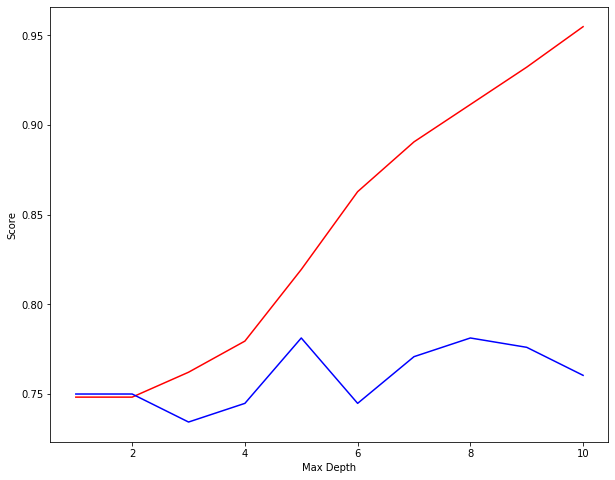

In [0]:
import matplotlib.pyplot as plt
import numpy as np

Training_Score = []
Testing_Score = []

Max_Depth = np.arange(10) + 1

for depth in Max_Depth:
    DTObject = DecisionTreeClassifier(max_depth=depth, random_state=5)
    DTFitting = DTObject.fit(X_train, y_train)
    Training_Score.append(DTFitting.score(X_train, y_train))
    Testing_Score.append(DTFitting.score(X_test, y_test))

plt.figure(figsize = (10,8))
plt.plot(Max_Depth, Training_Score, c='red')
plt.plot(Max_Depth, Testing_Score, c='blue')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.show()

In [0]:
Dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

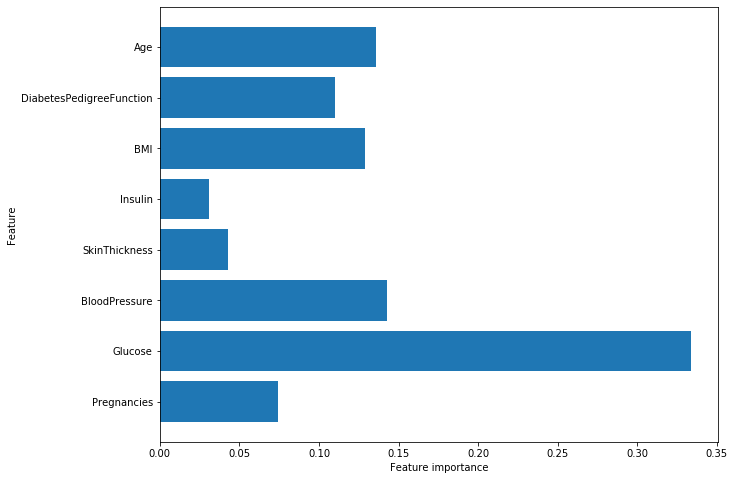

In [0]:
import matplotlib.pyplot as plt
import numpy as np

n_features = X.shape[1]
Feature_name = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

plt.figure(figsize=(10,8))

plt.barh(np.arange(n_features), DTFitting.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features),Feature_name)
plt.xlabel('Feature importance')
plt.ylabel('Feature')

plt.show()

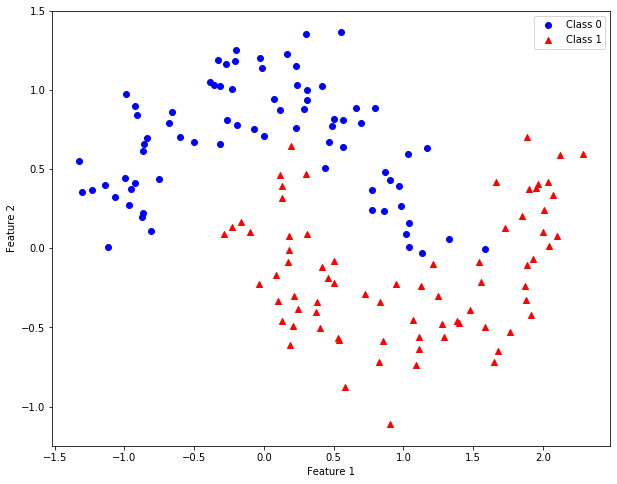

In [0]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X, y = make_moons(n_samples=150, noise=0.2, random_state=2)

plt.figure(figsize=(10,8))

plt.scatter(X[y==0,0],X[y==0,1], c='blue', marker = 'o', label= 'Class 0')
plt.scatter(X[y==1,0],X[y==1,1], c='red', marker = '^', label= 'Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [0]:
from sklearn.ensemble import RandomForestClassifier
RFObject = RandomForestClassifier(n_estimators =5, random_state= 0)

In [0]:
RFFitting = RFObject.fit(X_train, y_train)

In [0]:
RFFitting.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [0]:
RFFitting.score(X_test, y_test)

0.868421052631579

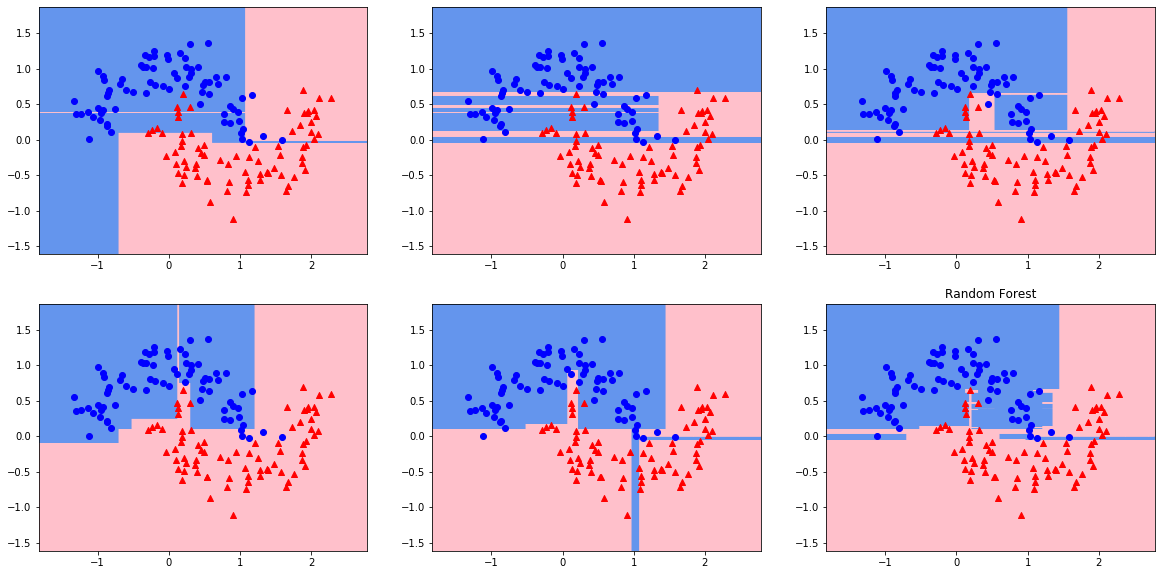

In [0]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
camp_list = ListedColormap(['cornflowerbule', 'pink'])

x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5

x_index = np.linspace(x_min, x_max, 1000)
y_index = np.linspace(y_min, y_max, 1000)

x_grid, y_grid = np.meshgrid(x_index, y_index)

X_samples = np.c_[x_grid.ravel(), y_grid.ravel()]

fig, axes = plt.subplots(2,3,figsize=(20,10))

for (axe, RandomForest) in zip(axes.ravel(), RFFitting.estimators_):
    
    Prediction_X = RandomForest.predict(X_samples)
    Prediction_X = Prediction_X.reshape(x_grid.shape)

    axe.pcolormesh(x_grid, y_grid, Prediction_X, alpha = 0.4, cmap = camp_color)
    axe.scatter(X[y==0,0],X[y==0,1], c='blue', marker = 'o', label= 'Class 0')
    axe.scatter(X[y==1,0],X[y==1,1], c='red', marker = '^', label= 'Class 1')


Prediction_ensemble_result = np.zeros(X_samples.shape[0])

for RandomForest in RFFitting.estimators_:
    Prediction_ensemble_result = Prediction_ensemble_result + RandomForest.predict(X_samples)
    
Index01 = Prediction_ensemble_result > 2
Index02 = Prediction_ensemble_result < 3

Prediction_ensemble_result[Index01] = 1
Prediction_ensemble_result[Index02] = 0

Prediction_ensemble_result = Prediction_ensemble_result.reshape(x_grid.shape)
axes[-1,-1].pcolormesh(x_grid, y_grid, Prediction_ensemble_result, alpha = 0.4, cmap = camp_color)
axes[-1,-1].scatter(X[y==0,0],X[y==0,1], c='blue', marker = 'o', label= 'Class 0')
axes[-1,-1].scatter(X[y==1,0],X[y==1,1], c='red', marker = '^', label= 'Class 1')

axes[-1,-1].set_title('Random Forest')

plt.show()

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

CB_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(CB_data.data, CB_data.target, random_state = 0)

In [0]:
from sklearn.ensemble import RandomForestClassifier
RFObject = RandomForestClassifier(n_estimators=10, random_state=0)
RFFitting = RFObject.fit(X_train, y_train)

In [0]:
RFFitting.score(X_train, y_train)

1.0

In [0]:
RFFitting.score(X_test, y_test)

0.951048951048951

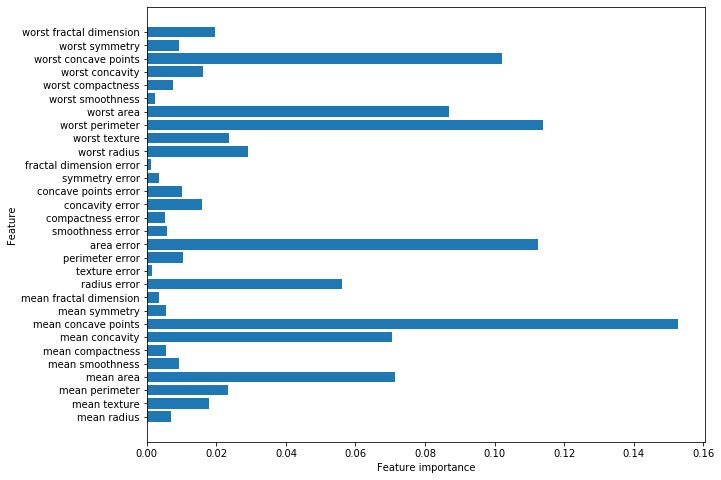

In [0]:
import matplotlib.pyplot as plt
import numpy as np

n_features = CB_data.data.shape[1]

plt.figure(figsize=(10,8))

plt.barh(np.arange(n_features), RFFitting.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), CB_data.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Feature')

plt.show()


In [0]:
import pandas as pd
Dataset = pd.read_csv('pima-indians-diabetes.csv')
Target = Dataset['Outcome']
Dataset.iloc[:,0:8]

X = Dataset.iloc[:,0:8].values
y = Target.values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [0]:
from sklearn.ensemble import RandomForestClassifier
RFObject = RandomForestClassifier(n_estimators=10, random_state=0)
RFFitting = RFObject.fit(X_train, y_train)

In [0]:
RFFitting.score(X_train, y_train)

0.9861111111111112

In [0]:
RFFitting.score(X_test, y_test)

0.7708333333333334

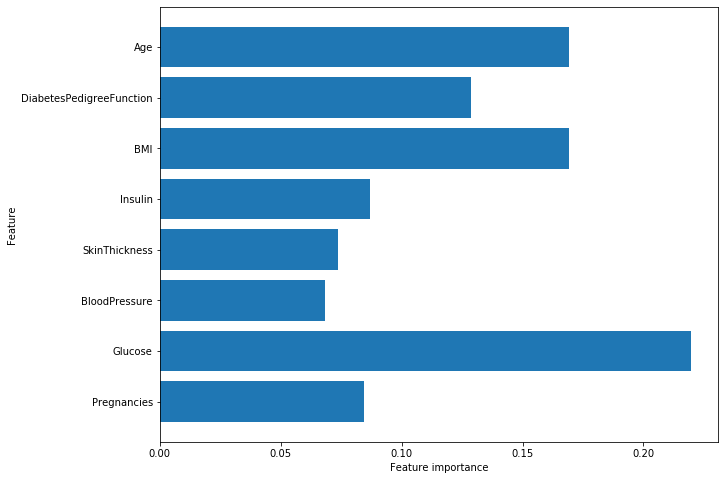

In [0]:
import matplotlib.pyplot as plt
import numpy as np

n_features = X.shape[1]
Feature_name = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

plt.figure(figsize=(10,8))

plt.barh(np.arange(n_features), RFFitting.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features),Feature_name)
plt.xlabel('Feature importance')
plt.ylabel('Feature')

plt.show()

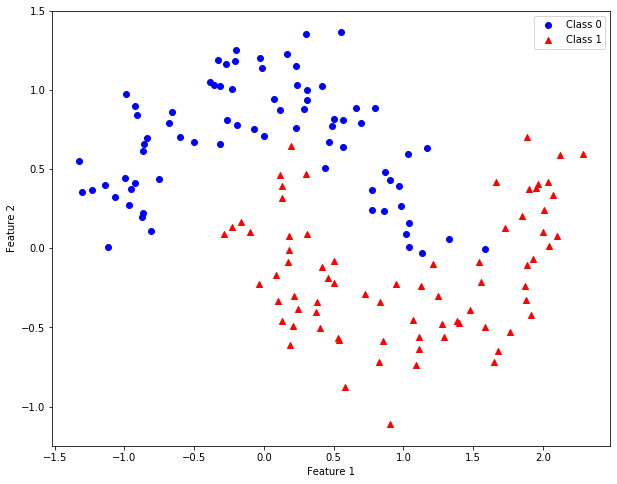

In [0]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X, y = make_moons(n_samples=150, noise=0.2, random_state=2)

plt.figure(figsize=(10,8))

plt.scatter(X[y==0,0],X[y==0,1], c='blue', marker = 'o', label= 'Class 0')
plt.scatter(X[y==1,0],X[y==1,1], c='red', marker = '^', label= 'Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
GBObject = GradientBoostingClassifier(n_estimators=10, random_state=0, max_depth=5)
GBFitting = GBObject.fit(X_train, y_train)

In [0]:
GBFitting.score(X_train, y_train)

0.9821428571428571

In [0]:
GBFitting.score(X_test, y_test)

0.8421052631578947

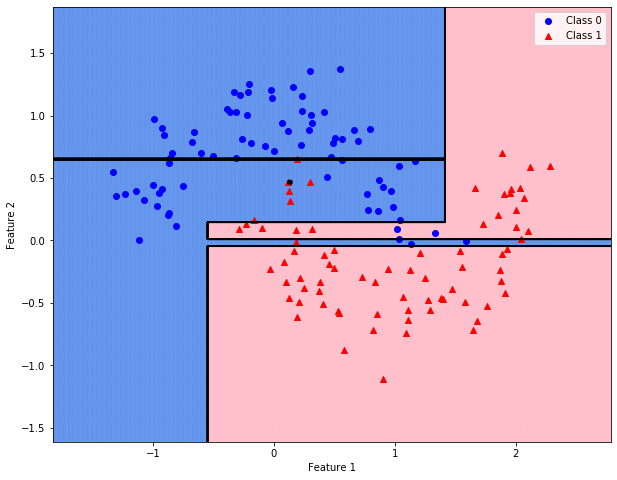

In [0]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

camp_color = ListedColormap(['cornflowerblue', 'pink'])

x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5

x_index = np.linspace(x_min, x_max, 1000)
y_index = np.linspace(y_min, y_max, 1000)

x_grid, y_grid = np.meshgrid(x_index, y_index)

X_samples = np.c_[x_grid.ravel(), y_grid.ravel()]

Prediction_X = GBFitting.predict(X_samples)

Prediction_X = Prediction_X.reshape(x_grid.shape)

plt.figure(figsize=(10,8))

plt.pcolormesh(x_grid, y_grid, Prediction_X, alpha = 0.4, cmap = camp_color)
plt.contour(x_grid, y_grid, Prediction_X, colors = 'black')

plt.scatter(X[y==0,0],X[y==0,1], c='blue', marker = 'o', label= 'Class 0')
plt.scatter(X[y==1,0],X[y==1,1], c='red', marker = '^', label= 'Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.show()

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

CB_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(CB_data.data, CB_data.target, random_state = 0)

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
GBObject = GradientBoostingClassifier(n_estimators=3, random_state=0, max_depth=2)
GBFitting = GBObject.fit(X_train, y_train)

In [0]:
GBFitting.score(X_train, y_train)

0.9225352112676056

In [0]:
GBFitting.score(X_test, y_test)

0.9370629370629371

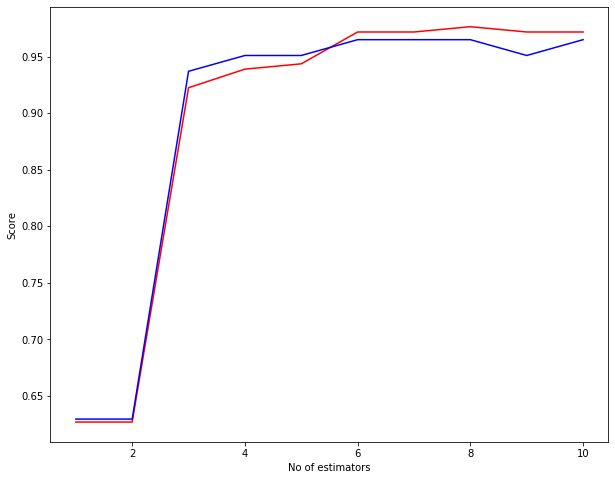

In [0]:
import matplotlib.pyplot as plt
import numpy as np

Training_Score = []
Testing_Score = []

No_estimators = np.arange(10) + 1

for n in No_estimators:
    GBObject = GradientBoostingClassifier(n_estimators=n, random_state=0, max_depth=2)
    GBFitting = GBObject.fit(X_train, y_train)
    Training_Score.append(GBFitting.score(X_train, y_train))
    Testing_Score.append(GBFitting.score(X_test, y_test))

plt.figure(figsize = (10,8))
plt.plot(No_estimators, Training_Score, c='red')
plt.plot(No_estimators, Testing_Score, c='blue')
plt.xlabel('No of estimators')
plt.ylabel('Score')
plt.show()

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

CB_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(CB_data.data, CB_data.target, random_state = 0)

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
GBObject = GradientBoostingClassifier(n_estimators=3, random_state=0, max_depth=2)
GBFitting = GBObject.fit(X_train, y_train)

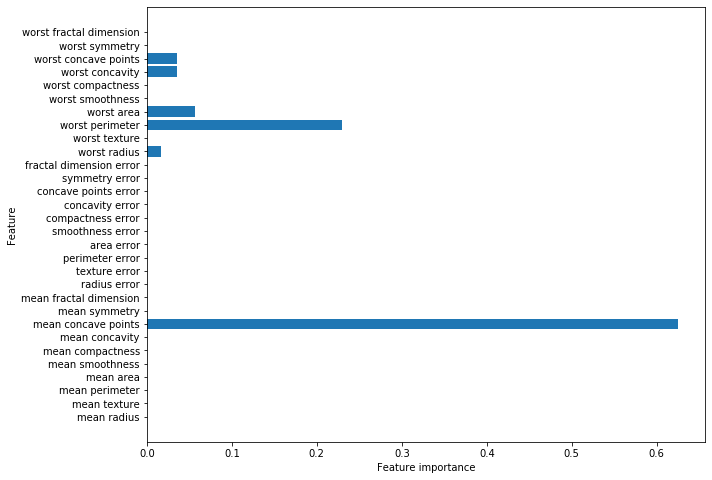

In [0]:
import matplotlib.pyplot as plt
import numpy as np

n_features = CB_data.data.shape[1]

plt.figure(figsize=(10,8))

plt.barh(np.arange(n_features), GBFitting.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), CB_data.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Feature')

plt.show()

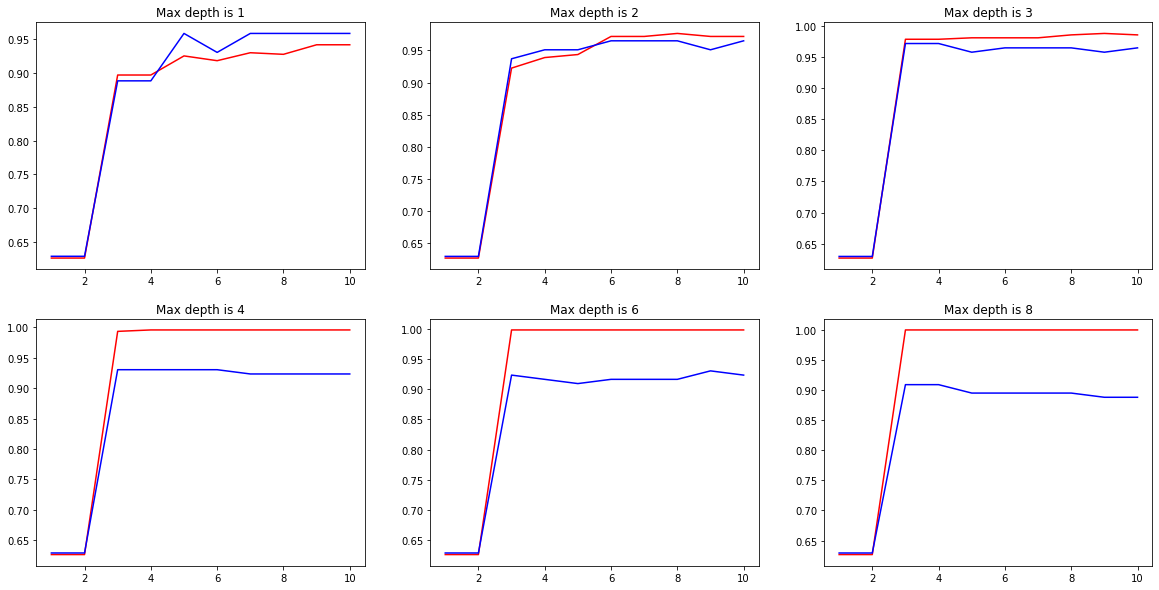

In [0]:
import matplotlib.pyplot as plt
import numpy as np

No_estimators = np.arange(10) + 1
fig, axes = plt.subplots(2,3, figsize=(20,10))
Max_depth = [1, 2, 3, 4, 6, 8]

for (axe, m) in zip(axes.ravel(), Max_depth):
    Training_Score = []
    Testing_Score = []
    for n in No_estimators:
        GBObject = GradientBoostingClassifier(n_estimators=n, random_state=0, max_depth=m)
        GBFitting = GBObject.fit(X_train, y_train)
        Training_Score.append(GBFitting.score(X_train, y_train))
        Testing_Score.append(GBFitting.score(X_test, y_test))

    axe.plot(No_estimators, Training_Score, c='red')
    axe.plot(No_estimators, Testing_Score, c='blue')
    axe.set_title(f'Max depth is {m}')

plt.show()

In [0]:
import pandas as pd
Dataset = pd.read_csv('pima-indians-diabetes.csv')
Target = Dataset['Outcome']
Dataset.iloc[:,0:8]

X = Dataset.iloc[:,0:8].values
y = Target.values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
GBObject = GradientBoostingClassifier(n_estimators=10, random_state=0, max_depth=10)
GBFitting = GBObject.fit(X_train, y_train)

In [0]:
GBFitting.score(X_train, y_train)

0.9930555555555556

In [0]:
GBFitting.score(X_test, y_test)

0.75

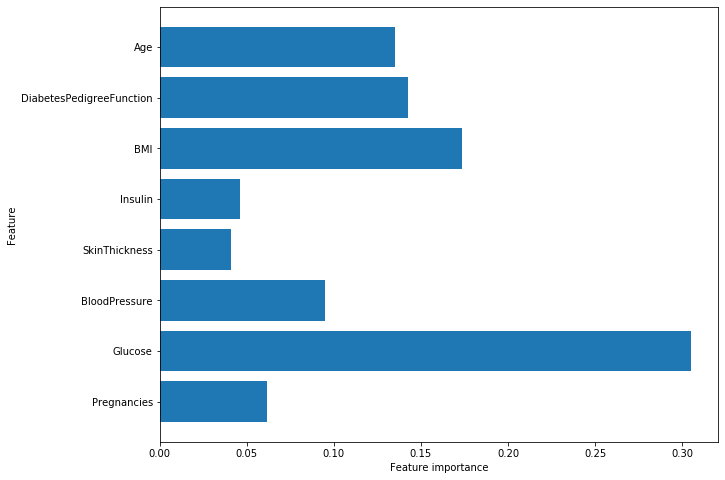

In [0]:
import matplotlib.pyplot as plt
import numpy as np

n_features = X.shape[1]
Feature_name = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

plt.figure(figsize=(10,8))

plt.barh(np.arange(n_features), GBFitting.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features),Feature_name)
plt.xlabel('Feature importance')
plt.ylabel('Feature')

plt.show()

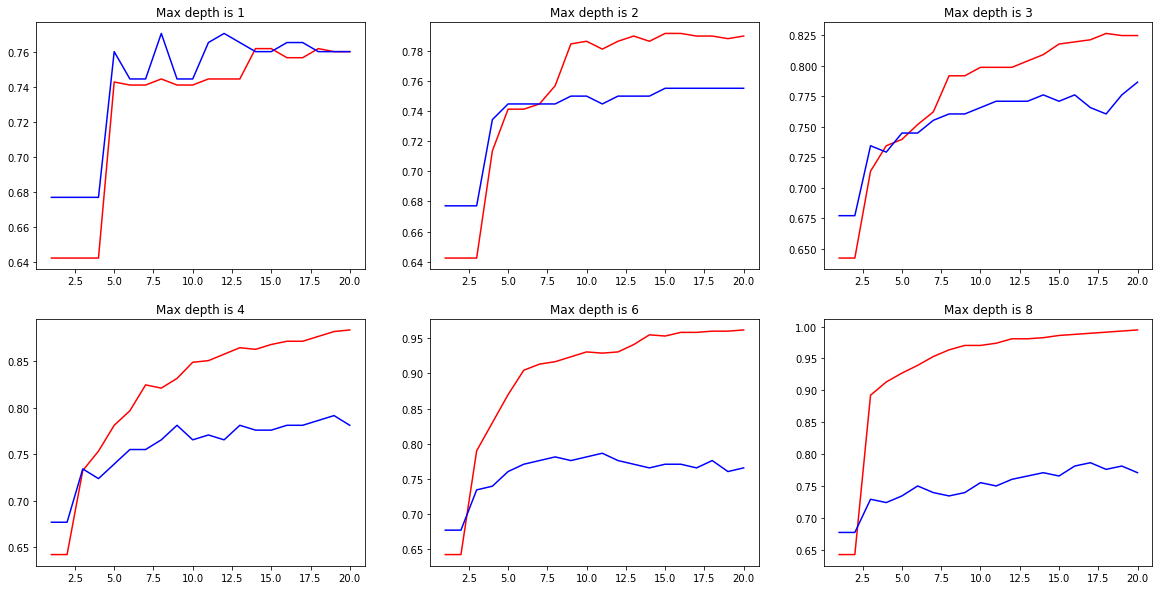

In [0]:
import matplotlib.pyplot as plt
import numpy as np

No_estimators = np.arange(20) + 1
fig, axes = plt.subplots(2,3, figsize=(20,10))
Max_depth = [1, 2, 3, 4, 6, 8]

for (axe, m) in zip(axes.ravel(), Max_depth):
    Training_Score = []
    Testing_Score = []
    for n in No_estimators:
        GBObject = GradientBoostingClassifier(n_estimators=n, random_state=0, max_depth=m)
        GBFitting = GBObject.fit(X_train, y_train)
        Training_Score.append(GBFitting.score(X_train, y_train))
        Testing_Score.append(GBFitting.score(X_test, y_test))

    axe.plot(No_estimators, Training_Score, c='red')
    axe.plot(No_estimators, Testing_Score, c='blue')
    axe.set_title(f'Max depth is {m}')

plt.show()

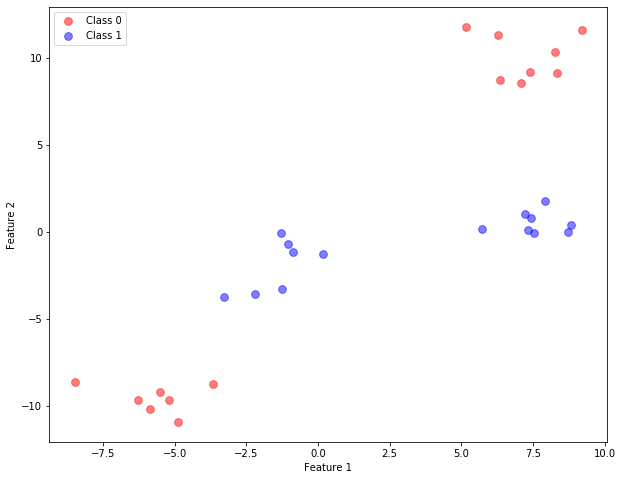

In [0]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=30, n_features=2, centers= 4, random_state=8)
y = y % 2

plt.figure(figsize=(10,8))
plt.scatter(X[y==0,0], X[y==0,1], marker = 'o', c='red', s= 60, alpha =0.5, label = 'Class 0')
plt.scatter(X[y==1,0], X[y==1,1], marker = 'o', c='blue', s= 60, alpha =0.5, label = 'Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [0]:
from sklearn.svm import LinearSVC
LSVCObject = LinearSVC(C=1, max_iter=10000)
LSVCFitting = LSVCObject.fit(X,y)

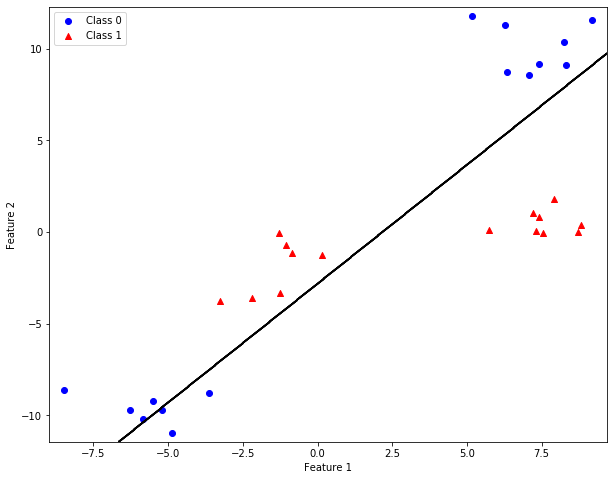

In [0]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

camp_color = ListedColormap(['cornflowerblue', 'pink'])

x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5

x_index = np.linspace(x_min, x_max, 1000)
y_index = np.linspace(y_min, y_max, 1000)

x_grid, y_grid = np.meshgrid(x_index, y_index)

X_samples = np.c_[x_grid.ravel(), y_grid.ravel()]

Prediction_X = LSVCFitting.predict(X_samples)

Prediction_X = Prediction_X.reshape(x_grid.shape)

plt.figure(figsize=(10,8))

#plt.pcolormesh(x_grid, y_grid, Prediction_X, alpha = 0.4, cmap = camp_color)
plt.contour(x_grid, y_grid, Prediction_X, colors = 'black')

plt.scatter(X[y==0,0],X[y==0,1], c='blue', marker = 'o', label= 'Class 0')
plt.scatter(X[y==1,0],X[y==1,1], c='red', marker = '^', label= 'Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.show()

In [0]:
import numpy as np
NewFeature = X[:,1:]**2

In [0]:
NewFeature

array([[1.33313062e+00],
       [1.57755370e+00],
       [5.70710310e-03],
       [8.50300473e+01],
       [7.58079794e+01],
       [3.17999596e+00],
       [1.09163536e+01],
       [1.78417146e-02],
       [5.30008070e-01],
       [7.36026381e+01],
       [1.29328251e+01],
       [6.38470386e-01],
       [9.38479229e+01],
       [1.33989180e+02],
       [5.79994637e-03],
       [8.39454878e+01],
       [8.35400435e+01],
       [1.19609550e+02],
       [1.38783657e+02],
       [1.39284647e+01],
       [1.27400362e+02],
       [1.03644308e+02],
       [7.68415325e+01],
       [3.10472909e-03],
       [7.45198908e+01],
       [1.56525645e-01],
       [1.08402508e+00],
       [1.07065259e+02],
       [1.03246607e-04],
       [9.40216172e+01]])

In [0]:
X[:,1]

array([-1.15461276e+00, -1.25600705e+00,  7.55453711e-02, -9.22117386e+00,
        8.70677779e+00,  1.78325432e+00, -3.30399056e+00,  1.33572881e-01,
       -7.28016532e-01,  8.57919798e+00, -3.59622373e+00,  7.99043419e-01,
       -9.68751376e+00,  1.15753695e+01, -7.61573790e-02,  9.16217702e+00,
        9.14002426e+00, -1.09366151e+01,  1.17806476e+01, -3.73208584e+00,
        1.12871769e+01, -1.01805849e+01, -8.76593021e+00, -5.57200960e-02,
       -8.63249041e+00,  3.95633220e-01,  1.04116525e+00,  1.03472344e+01,
        1.01610338e-02, -9.69647447e+00])

In [0]:
X

array([[-8.56843050e-01, -1.15461276e+00],
       [ 1.63343565e-01, -1.25600705e+00],
       [ 7.32096207e+00,  7.55453711e-02],
       [-5.50107854e+00, -9.22117386e+00],
       [ 6.34526126e+00,  8.70677779e+00],
       [ 7.91935905e+00,  1.78325432e+00],
       [-1.26286074e+00, -3.30399056e+00],
       [ 5.73790070e+00,  1.33572881e-01],
       [-1.05996477e+00, -7.28016532e-01],
       [ 7.09022949e+00,  8.57919798e+00],
       [-2.20208479e+00, -3.59622373e+00],
       [ 7.41515512e+00,  7.99043419e-01],
       [-6.27978180e+00, -9.68751376e+00],
       [ 9.19642422e+00,  1.15753695e+01],
       [-1.29445207e+00, -7.61573790e-02],
       [ 7.40292703e+00,  9.16217702e+00],
       [ 8.32813617e+00,  9.14002426e+00],
       [-4.87091502e+00, -1.09366151e+01],
       [ 5.17209648e+00,  1.17806476e+01],
       [-3.26042299e+00, -3.73208584e+00],
       [ 6.28516091e+00,  1.12871769e+01],
       [-5.84634283e+00, -1.01805849e+01],
       [-3.64340348e+00, -8.76593021e+00],
       [ 7.

In [0]:
import numpy as np
X_NewFeature = np.hstack([X,NewFeature])

In [0]:
X_NewFeature

array([[-8.56843050e-01, -1.15461276e+00,  1.33313062e+00],
       [ 1.63343565e-01, -1.25600705e+00,  1.57755370e+00],
       [ 7.32096207e+00,  7.55453711e-02,  5.70710310e-03],
       [-5.50107854e+00, -9.22117386e+00,  8.50300473e+01],
       [ 6.34526126e+00,  8.70677779e+00,  7.58079794e+01],
       [ 7.91935905e+00,  1.78325432e+00,  3.17999596e+00],
       [-1.26286074e+00, -3.30399056e+00,  1.09163536e+01],
       [ 5.73790070e+00,  1.33572881e-01,  1.78417146e-02],
       [-1.05996477e+00, -7.28016532e-01,  5.30008070e-01],
       [ 7.09022949e+00,  8.57919798e+00,  7.36026381e+01],
       [-2.20208479e+00, -3.59622373e+00,  1.29328251e+01],
       [ 7.41515512e+00,  7.99043419e-01,  6.38470386e-01],
       [-6.27978180e+00, -9.68751376e+00,  9.38479229e+01],
       [ 9.19642422e+00,  1.15753695e+01,  1.33989180e+02],
       [-1.29445207e+00, -7.61573790e-02,  5.79994637e-03],
       [ 7.40292703e+00,  9.16217702e+00,  8.39454878e+01],
       [ 8.32813617e+00,  9.14002426e+00

Text(0.5, 0, 'Third Feature')

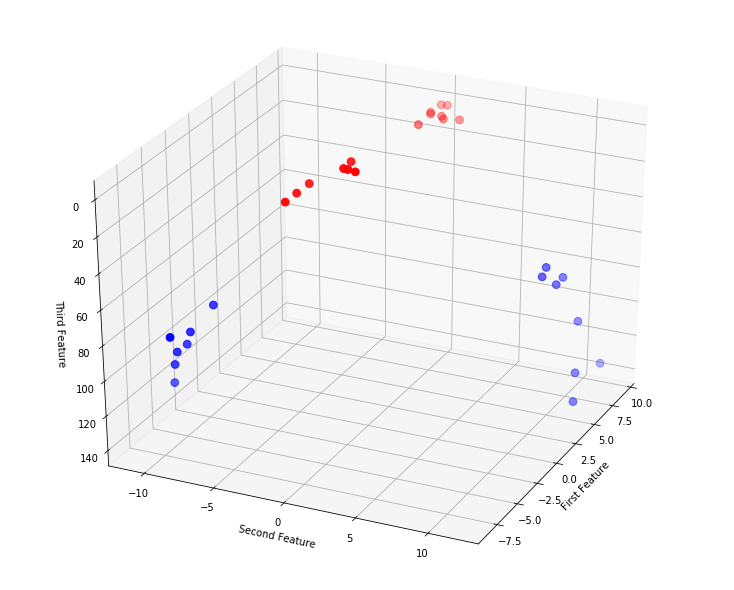

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure(figsize=(10,8))

axe = Axes3D(figure, elev=-150, azim =-25)

axe.scatter(X_NewFeature[y==0,0], X_NewFeature[y==0,1], X_NewFeature[y==0,2], c = 'b', s=60)
axe.scatter(X_NewFeature[y==1,0], X_NewFeature[y==1,1], X_NewFeature[y==1,2], c = 'r', s=60)

axe.set_xlabel('First Feature')
axe.set_ylabel('Second Feature')
axe.set_zlabel('Third Feature')

In [0]:
from sklearn.svm import LinearSVC
LSVCObject_3D = LinearSVC(C=1, max_iter=10000)
LSVCFitting_3D = LSVCObject_3D.fit(X_NewFeature,y)

In [0]:
LSVCFitting_3D.coef_

array([[ 0.08400044, -0.26231614, -0.05003695]])

In [0]:
LSVCFitting_3D.intercept_

array([0.87805541])

Text(0.5, 0, 'Third Feature')

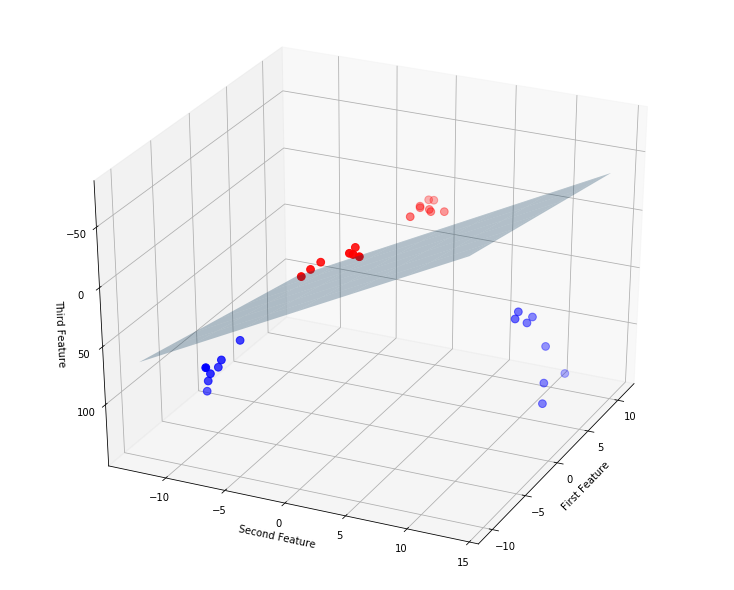

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

coef = LSVCFitting_3D.coef_.ravel()
intercept = LSVCFitting_3D.intercept_

figure = plt.figure(figsize=(10,8))

axe = Axes3D(figure, elev=-150, azim =-25)

x_axis = np.linspace(X_NewFeature[:,0].min()-2, X_NewFeature[:,0].max()+2,50)
y_axis = np.linspace(X_NewFeature[:,1].min()-2, X_NewFeature[:,1].max()+2,50)

X_point, Y_point = np.meshgrid(x_axis, y_axis)

Z_point = ((coef[0]*X_point+coef[1]*Y_point+intercept)/(-coef[2]))
           
axe.plot_surface(X_point, Y_point, Z_point, rstride = 8, cstride =8, alpha = 0.3)

axe.scatter(X_NewFeature[y==0,0], X_NewFeature[y==0,1], X_NewFeature[y==0,2], c = 'b', s=60)
axe.scatter(X_NewFeature[y==1,0], X_NewFeature[y==1,1], X_NewFeature[y==1,2], c = 'r', s=60)

axe.set_xlabel('First Feature')
axe.set_ylabel('Second Feature')
axe.set_zlabel('Third Feature')

In [0]:
X_point.shape

(50, 50)

In [0]:
coef[0]

array([ 0.08399881, -0.26231375, -0.05003281])

In [0]:
coef = LSVCFitting_3D.coef_

In [0]:
coef

array([[ 0.08400044, -0.26231614, -0.05003695]])